<a href="https://colab.research.google.com/github/vaibhavsadgir50/AI_Trading_BOT/blob/main/AI_Trading_BOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📈 AI Trading Bot — LSTM-Based Market Prediction

This project builds a deep learning model to predict stock price movement using historical data and technical indicators.

✅ Built with TensorFlow / Keras  
✅ Uses time-series forecasting (LSTM)  
✅ Designed for experimentation in Google Colab  
✅ No local setup required

---

### 🚀 Run This Notebook Instantly

Click below to launch in Google Colab:

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)]
(https://colab.research.google.com/github/vaibhavsadgir50/AI_Trading_BOT/blob/main/AI_Trading_BOT.ipynb)

In [ ]:
import yfinance as yf
import pandas as pd
from sklearn.metrics import accuracy_score
import numpy as np
# from ta import add_all_ta_features
from sklearn.model_selection import ParameterGrid
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

ticker='AAPL'
start_date='2022-01-01'
end_date=dt.datetime.now()-dt.timedelta(days=1)



# Fetch historical data
def fetch_stock_data(ticker, start_date, end_date):
    import yfinance as yf
    data = yf.download(tickers=ticker, start=start_date, end=end_date)
    return data


data= fetch_stock_data(ticker, start_date, end_date)

data.columns = data.columns.to_flat_index()

# # # Convert column names to lowercase strings
data.columns = [col[0].lower() for col in data.columns]

new_column_names = {
    'Open': 'open',
    'High': 'high',
    'Low': 'low',
    'Close': 'close',
    'Adj Close': 'adj_close',
    'Volume': 'volume'}
# # df = df.index.set_names(df['open', 'high', 'low', 'close', 'adj_close', 'volume'])
# df.rename(columns=new_column_names, inplace=True)


data.rename(columns=new_column_names)
data



[*********************100%***********************]  1 of 1 completed


,close,high,low,open,volume
Date,,,,,
2022-01-03,178.879913,179.734962,174.653874,174.771805,104487900
2022-01-04,176.609650,179.793936,176.039622,179.489269,99310400
2022-01-05,171.911835,177.071549,171.636651,176.521181,94537600
2022-01-06,169.042068,172.285320,168.688259,169.730027,96904000
2022-01-07,169.209122,171.145244,168.088727,169.916741,86709100
...,...,...,...,...,...
2025-03-04,235.929993,240.070007,234.679993,237.710007,53798100
2025-03-05,235.740005,236.550003,229.229996,235.419998,47227600
2025-03-06,235.330002,237.860001,233.160004,234.440002,45170400


In [ ]:


# Calculate technical indicators
def calculate_indicators(data, short_window=20, long_window=50):
    # Moving Averages
    data['Short_MA'] = data['close'].rolling(window=short_window).mean()
    data['Long_MA'] = data['close'].rolling(window=long_window).mean()

    # RSI calculation
    delta = data['close'].diff()
    gain = (delta := delta.where(delta > 0, 0))
    loss = (-delta.where(delta < 0, 0))
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    data['RSI'] = 100 - (100 / (1 + rs))

    # Bollinger Bands
    data['Mean'] = data['close'].rolling(window=20).mean()
    data['Std'] = data['close'].rolling(window=20).std()
    data['Upper_Band'] = data['Mean'] + (data['Std'] * 2)
    data['Lower_Band'] = data['Mean'] - 2 * data['Std']

    return data

stock_data_with_indicators =calculate_indicators(data)
stock_data_with_indicators

,close,high,low,open,volume,Short_MA,Long_MA,RSI,Mean,Std,Upper_Band,Lower_Band
Date,,,,,,,,,,,,
2022-01-03,178.879913,179.734962,174.653874,174.771805,104487900,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,176.609650,179.793936,176.039622,179.489269,99310400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05,171.911835,177.071549,171.636651,176.521181,94537600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-06,169.042068,172.285320,168.688259,169.730027,96904000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-07,169.209122,171.145244,168.088727,169.916741,86709100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-03-04,235.929993,240.070007,234.679993,237.710007,53798100,238.834644,239.431245,100.0,238.834644,6.398212,251.631068,226.038219
2025-03-05,235.740005,236.550003,229.229996,235.419998,47227600,238.994427,239.190494,100.0,238.994427,6.271503,251.537434,226.451421
2025-03-06,235.330002,237.860001,233.160004,234.440002,45170400,239.150193,238.906781,100.0,239.150193,6.131374,251.412942,226.887444


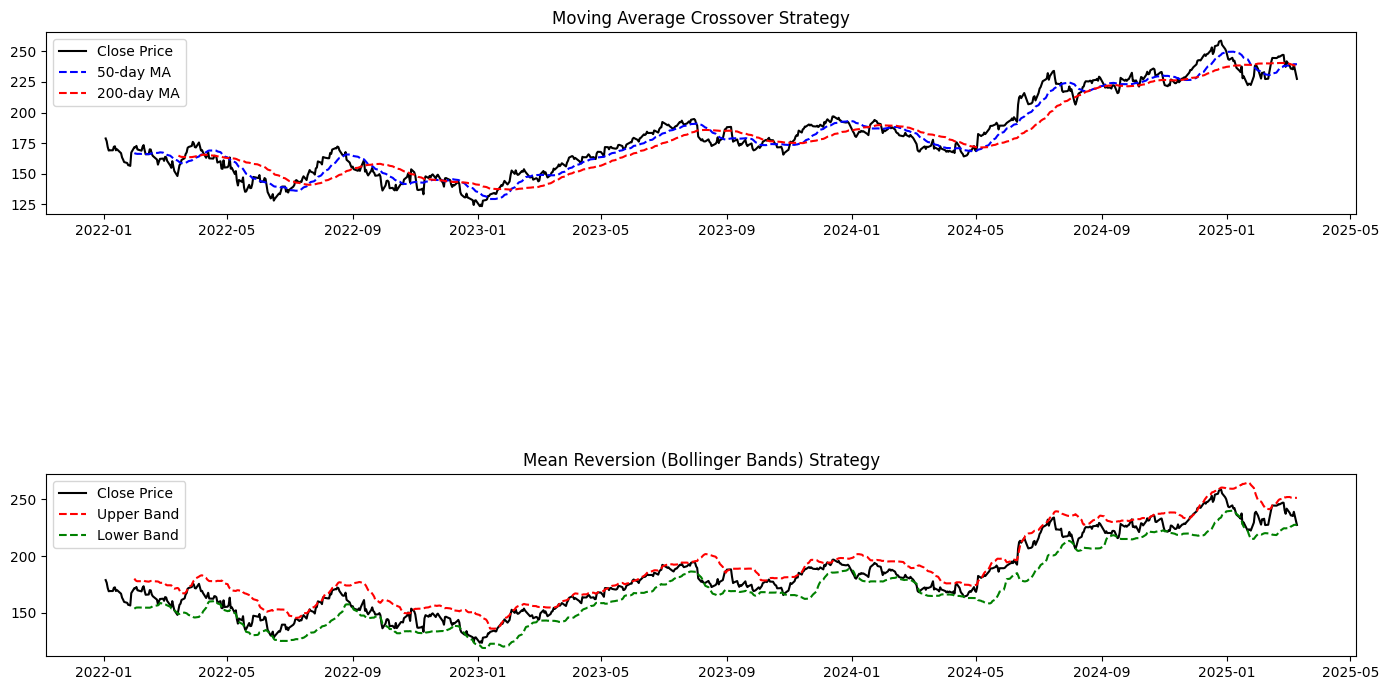

                 close  MA_Signal  RSI_Signal  MR_Signal
Date                                                    
2025-02-25  247.039993         -1          -1          0
2025-02-26  240.360001         -1          -1          0
2025-02-27  237.300003         -1          -1          0
2025-02-28  241.839996         -1          -1          0
2025-03-03  238.029999         -1          -1          0
2025-03-04  235.929993         -1          -1          0
2025-03-05  235.740005         -1          -1          0
2025-03-06  235.330002          1          -1          0
2025-03-07  239.070007          1          -1          0
2025-03-10  227.479996          1          -1          1
Final portfolio value after backtesting: 10037.57221574765
Accuracy of recommendations: 45.16%


In [ ]:


# Generate buy/sell signals based on indicators
def generate_signals(data):
    # MA crossover signal: 1 for buy, -1 for sell
    data['MA_Signal'] = 0
    data.loc[data['Short_MA'] > data['Long_MA'], 'MA_Signal'] = 1
    data.loc[data['Short_MA'] < data['Long_MA'], 'MA_Signal'] = -1

    # RSI signal: Buy when oversold (<30), Sell when overbought (>70)
    data['RSI_Signal'] = 0
    data.loc[data.RSI < 30, 'RSI_Signal'] = 1
    data.loc[data.RSI > 70, 'RSI_Signal'] = -1

    # Bollinger Bands mean reversion signal: Buy at lower band, sell at upper band
    data['MR_Signal'] = 0
    data.loc[data.close < data.Lower_Band, 'MR_Signal'] = 1
    data.loc[data.close > data.Upper_Band, 'MR_Signal'] = -1

    # Combine signals into a single recommendation column (majority vote)
    signals_sum = data[['MA_Signal', 'RSI_Signal', 'MR_Signal']].sum(axis=1)
    data['Final_Recommendation'] = signals_sum.apply(lambda x: 1 if x > 0 else (-1 if x < 0 else 0))

    # Plotting results
    plt.figure(figsize=(14, 7))

# Plot closing price with moving averages
    plt.subplot(3, 1, 1)
    plt.plot(data['close'], label="Close Price", color="black")
    plt.plot(data['Short_MA'], label="50-day MA", color="blue", linestyle="dashed")
    plt.plot(data['Long_MA'], label="200-day MA", color="red", linestyle="dashed")
    plt.legend()
    plt.title("Moving Average Crossover Strategy")


# Plot Bollinger Bands with Close Price
    plt.subplot(3, 1, 3)
    plt.plot(data['close'], label="Close Price", color="black")
    plt.plot(data['Upper_Band'], label="Upper Band", color="red", linestyle="dashed")
    plt.plot(data['Lower_Band'], label="Lower Band", color="green", linestyle="dashed")
    plt.legend()
    plt.title("Mean Reversion (Bollinger Bands) Strategy")

    plt.tight_layout()
    plt.show()

# Show last few rows of the dataset with signals
    print(data[['close', 'MA_Signal', 'RSI_Signal', 'MR_Signal']].tail(10))


    return data

stock_signals=generate_signals(data)

# Simple backtesting function to evaluate performance of recommendations
def backtest_strategy(data, initial_capital=10000):
    capital = initial_capital = 10000  # Initial capital for backtesting ($10k example)
    position_size = capital_per_trade = capital * 0.05 # allocate 5% per trade as example

    positions_held = False

    for i in range(len(data)):
        recommendation = data.iloc[i]['Final_Recommendation']
        price_close = data.iloc[i]['close']

        if recommendation == 1 and not positions_held:
            entry_price = price_close
            positions_held = True

        elif recommendation == -1 and positions_held:
            profit_loss = (price_close - entry_price) * (position_size / entry_price)
            capital += profit_loss
            positions_held = False

        elif recommendation == 1 and not positions_held:
            positions_held = True

        # Update portfolio value here if needed
    print(f"Final portfolio value after backtesting: {capital}")
    return capital

final_capital=backtest_strategy(data)

stock_signals

data['Actual_Movement'] = np.sign(data['close'].shift(-1) - data['close'])


# Remove rows with neutral predictions (0) and NaNs
valid_signals = data[(data['Final_Recommendation'] != 0)].dropna()

# Compute accuracy
accuracy = accuracy_score(
    valid_signals['Final_Recommendation'],
    valid_signals['Actual_Movement']
)

print(f"Accuracy of recommendations: {accuracy * 100:.2f}%")







In [ ]:
# Create README.md
!echo "# AI Trading Bot" > README.md
!echo "This project is an AI-powered trading bot that analyzes stock market data and makes predictions." >> README.md




In [ ]:
# Create .gitignore
!echo "__pycache__/\n*.pyc\n*.pyo\n*.ipynb_checkpoints\n.env\n.DS_Store" > .gitignore



In [ ]:
# Create requirements.txt (You may need to modify the packages based on your project)
!pip freeze > requirements.txt